In [1]:
import sqlite3
from sqlalchemy import create_engine
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import os
import fastparquet
import geopandas as gpd
import calendar
from shapely.geometry import Point
from bokeh.plotting import figure, show
import plotly.express as px
from plotly.offline import iplot
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
path="F:/1_Bachelorarbeit/1_Daten/NOAA_Weather_Data_2009-June2016/Daily_Summary_Central_Park.csv"
dtypes={"AWND":np.float16,"PRCP":np.float16,"SNOW":np.float16,"TMAX":np.float16,"TMIN":np.float16}
df_weather_origin = pd.read_csv(path,dtype=dtypes,parse_dates=["DATE"])

In [3]:
df_weather_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 37 columns):
STATION      2738 non-null object
NAME         2738 non-null object
LATITUDE     2738 non-null float64
LONGITUDE    2738 non-null float64
ELEVATION    2738 non-null float64
DATE         2738 non-null datetime64[ns]
AWND         2708 non-null float16
FMTM         1003 non-null float64
PGTM         988 non-null float64
PRCP         2738 non-null float16
SNOW         2738 non-null float16
SNWD         2738 non-null float64
TAVG         0 non-null float64
TMAX         2738 non-null float16
TMIN         2738 non-null float16
TSUN         0 non-null float64
WDF2         2724 non-null float64
WDF5         2696 non-null float64
WSF2         2726 non-null float64
WSF5         2696 non-null float64
WT01         803 non-null float64
WT02         88 non-null float64
WT03         0 non-null float64
WT04         4 non-null float64
WT05         201 non-null float64
WT06         5 non-null float6

In [4]:
df_weather_origin

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT11,WT13,WT14,WT16,WT17,WT18,WT19,WT22
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2009-01-01,11.179688,615.0,47.0,0.000000,0.000000,0.0,NaN,26.0,15.0,NaN,300.0,310.0,23.0,36.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2009-01-02,6.261719,959.0,852.0,0.000000,0.000000,0.0,NaN,34.0,23.0,NaN,230.0,220.0,17.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2009-01-03,10.070312,1209.0,1106.0,0.000000,0.000000,0.0,NaN,38.0,29.0,NaN,290.0,280.0,17.0,25.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2009-01-04,7.609375,13.0,2353.0,0.000000,0.000000,0.0,NaN,42.0,25.0,NaN,270.0,270.0,19.9,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2009-01-05,6.929688,1023.0,1129.0,0.000000,0.000000,0.0,NaN,43.0,38.0,NaN,290.0,300.0,14.1,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
5,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2009-01-06,6.710938,2318.0,2329.0,0.080017,0.000000,0.0,NaN,38.0,31.0,NaN,70.0,60.0,15.0,17.9,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN
6,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2009-01-07,10.507812,609.0,604.0,1.190430,0.000000,0.0,NaN,38.0,31.0,NaN,60.0,60.0,25.1,32.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN
7,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2009-01-08,11.406250,1813.0,1605.0,0.000000,0.000000,0.0,NaN,38.0,29.0,NaN,270.0,280.0,21.0,31.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2009-01-09,9.617188,1542.0,1431.0,0.000000,0.000000,0.0,NaN,32.0,26.0,NaN,290.0,270.0,17.9,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2009-01-10,6.710938,2338.0,2135.0,0.140015,1.000000,0.0,NaN,30.0,23.0,NaN,60.0,60.0,16.1,23.9,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN


#### Best Case would be that we could use Weathertype but they are very untidy and we can't use it for later evaluation ->
#### so we should use DATE,AWND,PRCP(Precipitation),SNOW,TMIN,TMAX

In [5]:
df_weather_origin.describe()

,LATITUDE,LONGITUDE,ELEVATION,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT11,WT13,WT14,WT16,WT17,WT18,WT19,WT22
count,2.738000e+03,2738.00000,2.738000e+03,2708.000000,1003.000000,988.000000,2738.000000,2738.000000,2738.000000,0.0,2738.000000,2738.000000,0.0,2724.000000,2696.000000,2726.000000,2696.000000,803.0,88.0,0.0,4.0,201.0,5.0,51.0,487.0,14.0,1.0,537.0,1.0,578.0,8.0,107.0,43.0,22.0
mean,4.077898e+01,-73.96925,4.270000e+01,5.691406,1469.803589,1399.033401,0.136353,0.112854,0.642001,NaN,inf,inf,NaN,196.893906,200.546736,14.487344,22.430749,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,7.106725e-15,0.00000,1.421345e-14,2.490234,905.927812,642.351594,0.391846,0.944336,2.578252,NaN,18.390625,16.734375,NaN,99.855423,97.542570,4.018320,6.554766,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
min,4.077898e+01,-73.96925,4.270000e+01,0.219971,0.000000,2.000000,0.000000,0.000000,0.000000,NaN,15.000000,-1.000000,NaN,10.000000,5.000000,6.000000,8.900000,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,4.077898e+01,-73.96925,4.270000e+01,3.800781,1030.000000,1011.250000,0.000000,0.000000,0.000000,NaN,48.000000,36.000000,NaN,80.000000,130.000000,12.100000,17.000000,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,4.077898e+01,-73.96925,4.270000e+01,5.140625,1458.000000,1500.000000,0.000000,0.000000,0.000000,NaN,64.000000,49.000000,NaN,240.000000,240.000000,14.100000,21.900000,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,4.077898e+01,-73.96925,4.270000e+01,6.929688,1912.000000,1909.000000,0.049988,0.000000,0.000000,NaN,79.000000,63.000000,NaN,280.000000,280.000000,17.000000,25.900000,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,4.077898e+01,-73.96925,4.270000e+01,22.812500,9999.000000,2359.000000,5.808594,27.296875,23.000000,NaN,104.000000,84.000000,NaN,360.000000,360.000000,38.000000,62.000000,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Observation:
#### 1. 30 Missing Values for Average daily Wind Speed
#### 2. TMAX and TMIN are in Fahrenheit
#### 3. PRCP and SNOW are in inches
#### 4. AWND is in Miles per Hour

In [6]:
#
df_weather_selected=df_weather_origin[["DATE","AWND","PRCP","SNOW","TMAX","TMIN"]]

In [7]:
df_weather_selected

,DATE,AWND,PRCP,SNOW,TMAX,TMIN
0,2009-01-01,11.179688,0.000000,0.000000,26.0,15.0
1,2009-01-02,6.261719,0.000000,0.000000,34.0,23.0
2,2009-01-03,10.070312,0.000000,0.000000,38.0,29.0
3,2009-01-04,7.609375,0.000000,0.000000,42.0,25.0
4,2009-01-05,6.929688,0.000000,0.000000,43.0,38.0
5,2009-01-06,6.710938,0.080017,0.000000,38.0,31.0
6,2009-01-07,10.507812,1.190430,0.000000,38.0,31.0
7,2009-01-08,11.406250,0.000000,0.000000,38.0,29.0
8,2009-01-09,9.617188,0.000000,0.000000,32.0,26.0
9,2009-01-10,6.710938,0.140015,1.000000,30.0,23.0


### Checking if there are any NaN Values in the Columns

In [8]:
df_weather_selected.isnull().sum()

DATE     0
AWND    30
PRCP     0
SNOW     0
TMAX     0
TMIN     0
dtype: int64

In [9]:
num_entries=2738
percent=(df_weather_selected["AWND"].isnull().sum() / num_entries)*100
print(str(percent) + "%")

1.095690284879474%


In [10]:
# Check the NaN Values of Drop-offs
df_weather_selected.loc[df_weather_selected.isnull().any(axis=1)]

,DATE,AWND,PRCP,SNOW,TMAX,TMIN
142,2009-05-23,NaN,0.000000,0.0,73.0,60.0
143,2009-05-24,NaN,0.000000,0.0,83.0,60.0
144,2009-05-25,NaN,0.000000,0.0,81.0,63.0
145,2009-05-26,NaN,0.000000,0.0,66.0,53.0
149,2009-05-30,NaN,0.000000,0.0,77.0,60.0
150,2009-05-31,NaN,0.000000,0.0,81.0,57.0
176,2009-06-26,NaN,0.729980,0.0,83.0,64.0
177,2009-06-27,NaN,0.020004,0.0,81.0,63.0
178,2009-06-28,NaN,0.000000,0.0,82.0,64.0
382,2010-01-18,NaN,0.049988,0.0,50.0,37.0


### Problem:
### 1. Missing Value for AWND (30 Rows)
### Solution: Replace NaN with the mean Value of AWND and create Column Dummy_Value to mark it as True Value

![](Weather_Data_missing_value_AWND.jpg)

### Replace NaN Values with mean Value and create Column Dummy_Variable

In [11]:
df_weather_selected["is_dummy"]=False
# Replace all NaN with mean Value and set is_dummy to True
df_weather_selected.fillna(value=df_weather_selected["AWND"].mean(),inplace=True)
df_weather_selected.loc[(df_weather_selected["AWND"]==5.69141),["is_dummy"]]=True

c:\users\thu-bao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\users\thu-bao\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\users\thu-bao\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

### The Values of TMAX and TMIN are in Fahrenheit -> Convert to Celsius

In [12]:
df_weather_selected["TMAX"]=(df_weather_selected["TMAX"] - 32) * 5.0/9.0
df_weather_selected["TMIN"]=(df_weather_selected["TMIN"] - 32) * 5.0/9.0

c:\users\thu-bao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\users\thu-bao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### The Values of PRCP(Precipitation) and SNOW are in inches -> convert to mm

In [13]:
df_weather_selected["PRCP"]=df_weather_selected["PRCP"]* 25.4
df_weather_selected["SNOW"]=df_weather_selected["SNOW"]* 25.4

c:\users\thu-bao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\users\thu-bao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [14]:
df_weather_selected.describe()

,AWND,PRCP,SNOW,TMAX,TMIN
count,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000
mean,5.687500,3.464844,2.867188,17.125000,9.148438
std,2.476562,9.960938,inf,10.210938,9.296875
min,0.219971,0.000000,0.000000,-9.445312,-18.328125
25%,3.800781,0.000000,0.000000,8.890625,2.222656
50%,5.371094,0.000000,0.000000,17.781250,9.445312
75%,6.929688,1.269531,0.000000,26.109375,17.218750
max,22.812500,147.625000,693.500000,40.000000,28.890625


### Exploratory Analysis

### How is the Distribution of TMAX?

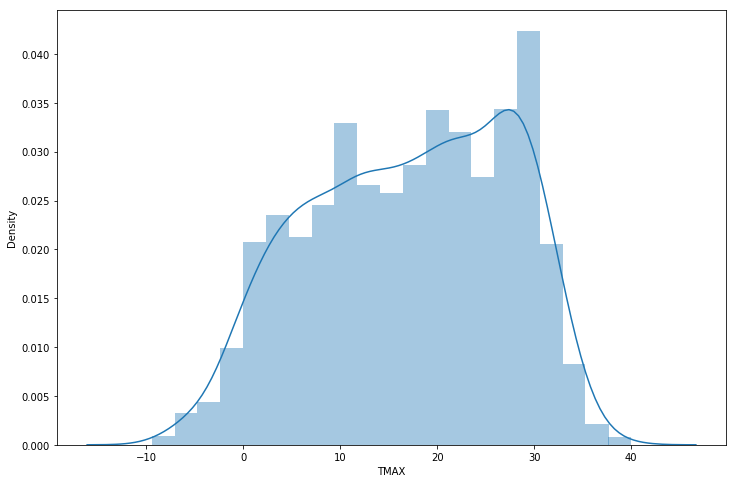

In [15]:
plt.figure(figsize = (12, 8))
plt.xlabel('TMAX') 
plt.ylabel('Density')
sns.distplot(df_weather_selected["TMAX"]);

#### Observation
#### 1. The most max Temperature is in area between 26-30 Celsius

### How is the Distribution of TMin?

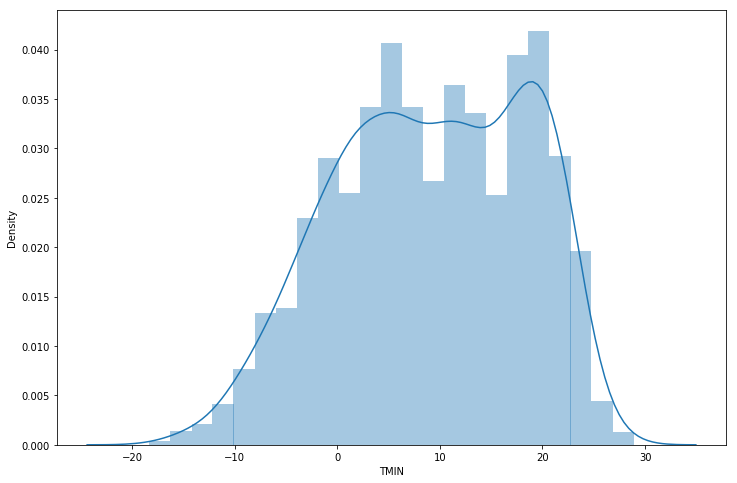

In [16]:
plt.figure(figsize = (12, 8))
plt.xlabel('TMIN') 
plt.ylabel('Density')
sns.distplot(df_weather_selected["TMIN"]);

#### Observation
#### 1.The most min. Temperature is in between 16-20 Celsius

### How is the Distribution of Precipitation?

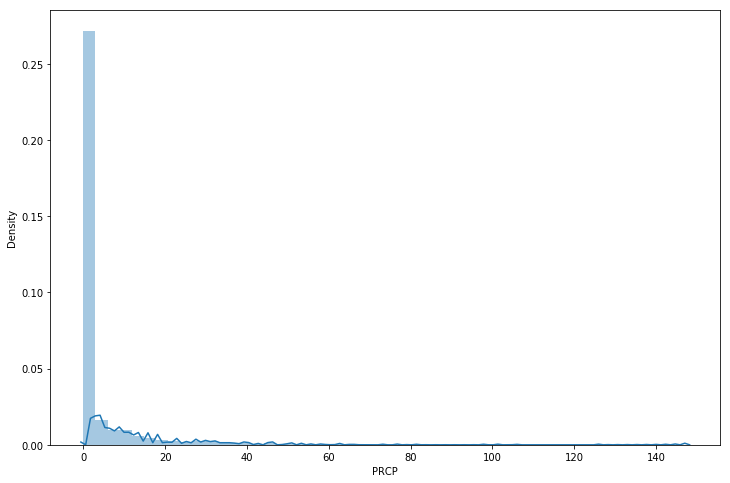

In [17]:
plt.figure(figsize = (12, 8))
plt.xlabel('Precipitation') 
plt.ylabel('Density')
sns.distplot(df_weather_selected["PRCP"]);

#### Observation
#### 1. The most Precipitation is in area between 0-2

### How is the Distribution of Averge daily Wind Speed?

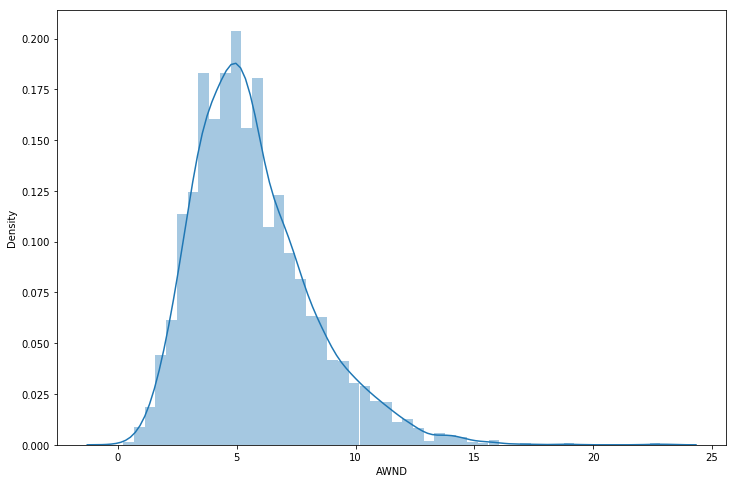

In [18]:
plt.figure(figsize = (12, 8))
plt.xlabel('Average daily Wind Speed') 
plt.ylabel('Density')
sns.distplot(df_weather_selected["AWND"]);

#### Observation
#### 1. The most Precipitation is in area between 5-6

### How does TMAX developed over the Years?

c:\users\thu-bao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



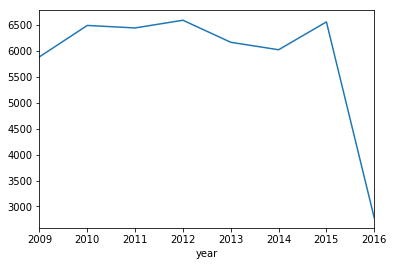

In [19]:
df_weather_selected["year"]=df_weather_selected["DATE"].dt.year
df_weather_selected.groupby("year")["TMAX"].sum().plot()

#### Observation:
#### 1. between 2015-2016 is a strong decrease

### How does TMIN developed over the Years?

c:\users\thu-bao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



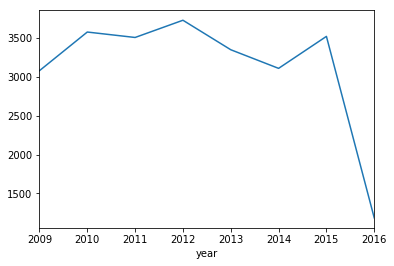

In [20]:
df_weather_selected["year"]=df_weather_selected["DATE"].dt.year
df_weather_selected.groupby("year")["TMIN"].sum().plot()

#### Observation:
#### 1. in 2015-2016 is a strong decrease

### How does TMAX developed over Months?

c:\users\thu-bao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



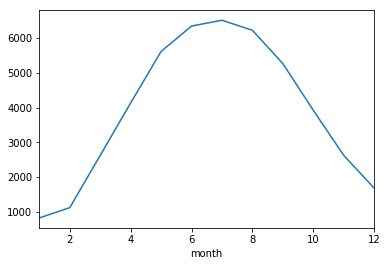

In [21]:
df_weather_selected["month"]=df_weather_selected["DATE"].dt.month
df_weather_selected.groupby("month")["TMAX"].sum().plot()

#### Observation:
#### 1. Between Month June to August is the highest Temperature

### How does TMIN developed over Months?

c:\users\thu-bao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



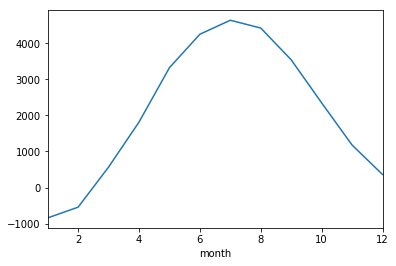

In [22]:
df_weather_selected["month"]=df_weather_selected["DATE"].dt.month
df_weather_selected.groupby("month")["TMIN"].sum().plot()

#### Observation:
#### 1. Between Month June to August is the highest Temperature

### How does the TMAX developed over the years every day?

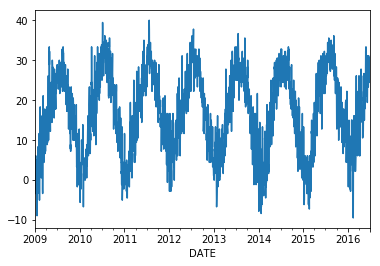

In [23]:
df_weather_selected.groupby("DATE")["TMAX"].sum().plot()

### How does the TMIN developed over the years every day?

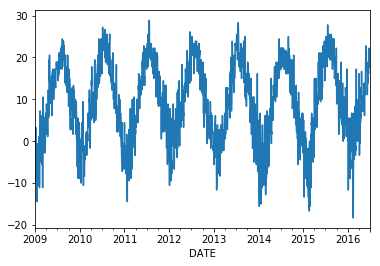

In [24]:
df_weather_selected.groupby("DATE")["TMIN"].sum().plot()

In [25]:
df_weather_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 9 columns):
DATE        2738 non-null datetime64[ns]
AWND        2738 non-null float16
PRCP        2738 non-null float16
SNOW        2738 non-null float16
TMAX        2738 non-null float16
TMIN        2738 non-null float16
is_dummy    2738 non-null bool
year        2738 non-null int64
month       2738 non-null int64
dtypes: bool(1), datetime64[ns](1), float16(5), int64(2)
memory usage: 93.7 KB


### Load Weather_data to Database

In [26]:
# Create Database or if Name is there open Database
path="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/Sqlite/NYC_Yellow_Cab_Tripdata"
connection = sqlite3.connect(path)
# Create Cursor for SQL-Commands
cursor=connection.cursor()

In [27]:
# First Create Table for Database Weather_data
sql_command= "CREATE TABLE weather_data (ID INTEGER PRIMARY KEY AUTOINCREMENT, Date TIMESTAMP, AWND REAL, PRCP REAL, SNOW REAL, TMAX REAL, TMIN REAL, is_dummy INTEGER, year INTEGER, month INTEGER);"
cursor.execute(sql_command)

In [28]:
df_weather_selected.to_sql(name="weather_data", con=connection, if_exists="append", index=False) 

In [29]:
# Look into Table to confirm that the data are loaded
sql = "SELECT * FROM weather_data LIMIT 10;"  
df = pd.read_sql_query(sql, connection)
df.head(10)

,ID,Date,AWND,PRCP,SNOW,TMAX,TMIN,is_dummy,year,month
0,1,2009-01-01 00:00:00,11.179688,0.000000,0.00000,-3.333984,-9.445312,0,2009,1
1,2,2009-01-02 00:00:00,6.261719,0.000000,0.00000,1.111328,-5.000000,0,2009,1
2,3,2009-01-03 00:00:00,10.070312,0.000000,0.00000,3.333984,-1.666992,0,2009,1
3,4,2009-01-04 00:00:00,7.609375,0.000000,0.00000,5.554688,-3.888672,0,2009,1
4,5,2009-01-05 00:00:00,6.929688,0.000000,0.00000,6.109375,3.333984,0,2009,1
5,6,2009-01-06 00:00:00,6.710938,2.033203,0.00000,3.333984,-0.555664,0,2009,1
6,7,2009-01-07 00:00:00,10.507812,30.250000,0.00000,3.333984,-0.555664,0,2009,1
7,8,2009-01-08 00:00:00,11.406250,0.000000,0.00000,3.333984,-1.666992,0,2009,1
8,9,2009-01-09 00:00:00,9.617188,0.000000,0.00000,0.000000,-3.333984,0,2009,1
9,10,2009-01-10 00:00:00,6.710938,3.556641,25.40625,-1.111328,-5.000000,0,2009,1


In [30]:
# Commit and close everything to save changes
cursor.close()
connection.commit()
connection.close()